# 

<img align="left" src = https://linea.org.br/wp-content/themes/LIneA/imagens/logo-header.jpg width=100 style="padding: 20px"> 

<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=160 style="padding: 20px">  

# QA DP0.2

**Contact author**: Heloisa da Silva Mengisztki ([heloisasmengisztki@gmail.com](mailto:heloisasmengisztki@gmail.com)) 

**Last verified run**: 2023-05-01 (YYYY-MM-DD) <br><br><br>

This notebook is a quality analysis of the dp0.2 data.

## Imports

In [50]:
import time
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 20)

%matplotlib inline

### Tap service

In [51]:
from lsst.rsp import get_tap_service

service = get_tap_service()

assert service is not None
assert service.baseurl == "https://data.lsst.cloud/api/tap"

## Reading file SSH?

## Reading DP0.2 data - TAP

For this step, we are going to read 1k of galaxies, the, we are going to use it to try running bpz_rail. Here we are going to use some values present in the TAP tutorial notebook from rubin science platform for coordenates and radius. 

In [9]:
max_rec = 1000
use_center_coords = "62, -37"
use_radius = "1.0"

In [10]:
bands = ['g', 'i', 'r', 'u', 'y', 'z']

mags = ""
for band in bands:
    mags+= f"scisql_nanojanskyToAbMag({band}_cModelFlux) AS mag_{band}_cModel, {band}_cModelFluxErr, "

columns_query = f"objectId, {mags}coord_ra, coord_dec "

In [11]:
query = "SELECT " + columns_query + \
        "FROM dp02_dc2_catalogs.Object " + \
        "WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec), CIRCLE('ICRS', " + use_center_coords + ", " + use_radius + ")) = 1 " + \
        "AND detect_isPrimary = 1 " + \
        "AND r_extendedness = 1 " + \
        "AND scisql_nanojanskyToAbMag(r_cModelFlux) > 17.0 " + \
        "AND scisql_nanojanskyToAbMag(r_cModelFlux) < 23.0 "
print(query)

SELECT objectId, scisql_nanojanskyToAbMag(g_cModelFlux) AS mag_g_cModel, g_cModelFluxErr, scisql_nanojanskyToAbMag(i_cModelFlux) AS mag_i_cModel, i_cModelFluxErr, scisql_nanojanskyToAbMag(r_cModelFlux) AS mag_r_cModel, r_cModelFluxErr, scisql_nanojanskyToAbMag(u_cModelFlux) AS mag_u_cModel, u_cModelFluxErr, scisql_nanojanskyToAbMag(y_cModelFlux) AS mag_y_cModel, y_cModelFluxErr, scisql_nanojanskyToAbMag(z_cModelFlux) AS mag_z_cModel, z_cModelFluxErr, coord_ra, coord_dec FROM dp02_dc2_catalogs.Object WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec), CIRCLE('ICRS', 62, -37, 1.0)) = 1 AND detect_isPrimary = 1 AND r_extendedness = 1 AND scisql_nanojanskyToAbMag(r_cModelFlux) > 17.0 AND scisql_nanojanskyToAbMag(r_cModelFlux) < 23.0 


In [12]:
%%time
results = service.search(query, maxrec=max_rec)
print(type(results))
results = results.to_table()
print(type(results))
results_pd = results.to_pandas()
results_pd.info(memory_usage="deep")

<class 'pyvo.dal.tap.TAPResults'>
<class 'astropy.table.table.Table'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   objectId         1000 non-null   int64  
 1   mag_g_cModel     992 non-null    float64
 2   g_cModelFluxErr  999 non-null    float64
 3   mag_i_cModel     999 non-null    float64
 4   i_cModelFluxErr  1000 non-null   float64
 5   mag_r_cModel     1000 non-null   float64
 6   r_cModelFluxErr  1000 non-null   float64
 7   mag_u_cModel     985 non-null    float64
 8   u_cModelFluxErr  1000 non-null   float64
 9   mag_y_cModel     992 non-null    float64
 10  y_cModelFluxErr  1000 non-null   float64
 11  mag_z_cModel     991 non-null    float64
 12  z_cModelFluxErr  1000 non-null   float64
 13  coord_ra         1000 non-null   float64
 14  coord_dec        1000 non-null   float64
dtypes: float64(14), int64(1)
memory usage

/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-5.1.0/lib/python3.10/site-packages/pyvo/dal/query.py:324: DALOverflowWarning: Partial result set. Potential causes MAXREC, async storage space, etc.
  warn("Partial result set. Potential causes MAXREC, async storage space, etc.",


In [13]:
results_pd.head()

objectId  mag_g_cModel  g_cModelFluxErr  mag_i_cModel  \
0  1567973949952790391     23.696957        12.548565     21.099163   
1  1567973949952790668     23.125924        26.289981     22.113301   
2  1567973949952790667     22.021820        23.262162     20.059149   
3  1567973949952791963     24.160903        18.812363     21.384871   
4  1567973949952790537     22.045110       237.919748     21.875550   

   i_cModelFluxErr  mag_r_cModel  r_cModelFluxErr  mag_u_cModel  \
0        27.521535     22.430446        14.663127     27.550546   
1        55.264729     22.779456        31.375358     23.013545   
2        49.698642     20.897961        28.538184     22.511459   
3        43.120937     22.578849        24.011901     26.213431   
4       264.995561     22.003669       168.407295     22.973886   

   u_cModelFluxErr  mag_y_cModel  y_cModelFluxErr  mag_z_cModel  \
0        34.653608     20.262099       164.774788     20.507491   
1        74.512305     21.919335       297.971598     22.004578   
2        63.082859     19.516139       264.040413     19.733546   
3        57.266093     20.521930       244.658876     20.860803   
4       882.941371     21.685076      1244.641438     21.791332   

   z_cModelFluxErr   coord_ra  coord_dec  
0        81.949101  61.602992 -37.293849  
1       172.905696  61.590751 -37.292278  
2       148.953966  61.589349 -37.292548  
3       129.454169  61.636723 -37.283918  
4       720.584251  61.690688 -37.295615

## Plot - Localização amostra

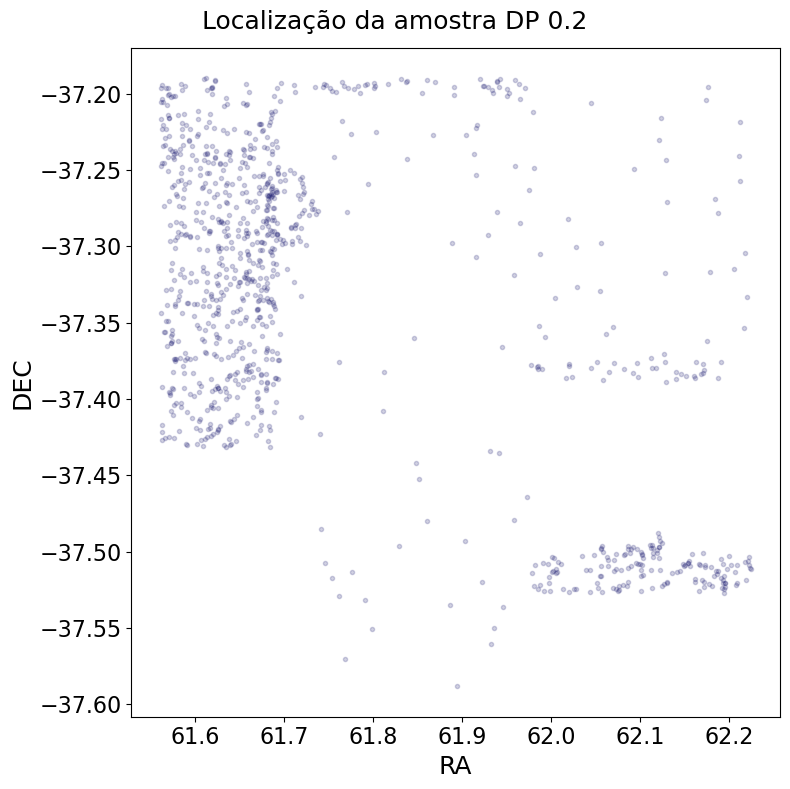

In [54]:
plt.figure(figsize=[8,8])
plt.suptitle("Localização da amostra DP 0.2", fontsize=18)

plt.plot(results_pd.coord_ra, results_pd.coord_dec, f".", color="midnightblue", alpha=0.2)
plt.xlabel("RA", fontsize=18)
plt.ylabel("DEC", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.xticks(fontsize=16)
plt.tight_layout()

## Hist - Qtd Magnitude

In [64]:
banda_cor = {
    "u": "r",
    "g": "m",
    "r": "b",
    "i": "c",
    "z": "g",
    "y": "y",
}

def monta_grafico_hist(pos, key):
    plt.subplot(2,3,pos)
    plt.hist(results_pd[f"mag_{key}_cModel"], bins="fd", color=f"{banda_cor.get(key)}")
    plt.xlabel(f"magnitude ({key}_band)", fontsize=16)
    plt.ylabel("qtd", fontsize=16)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.tight_layout()

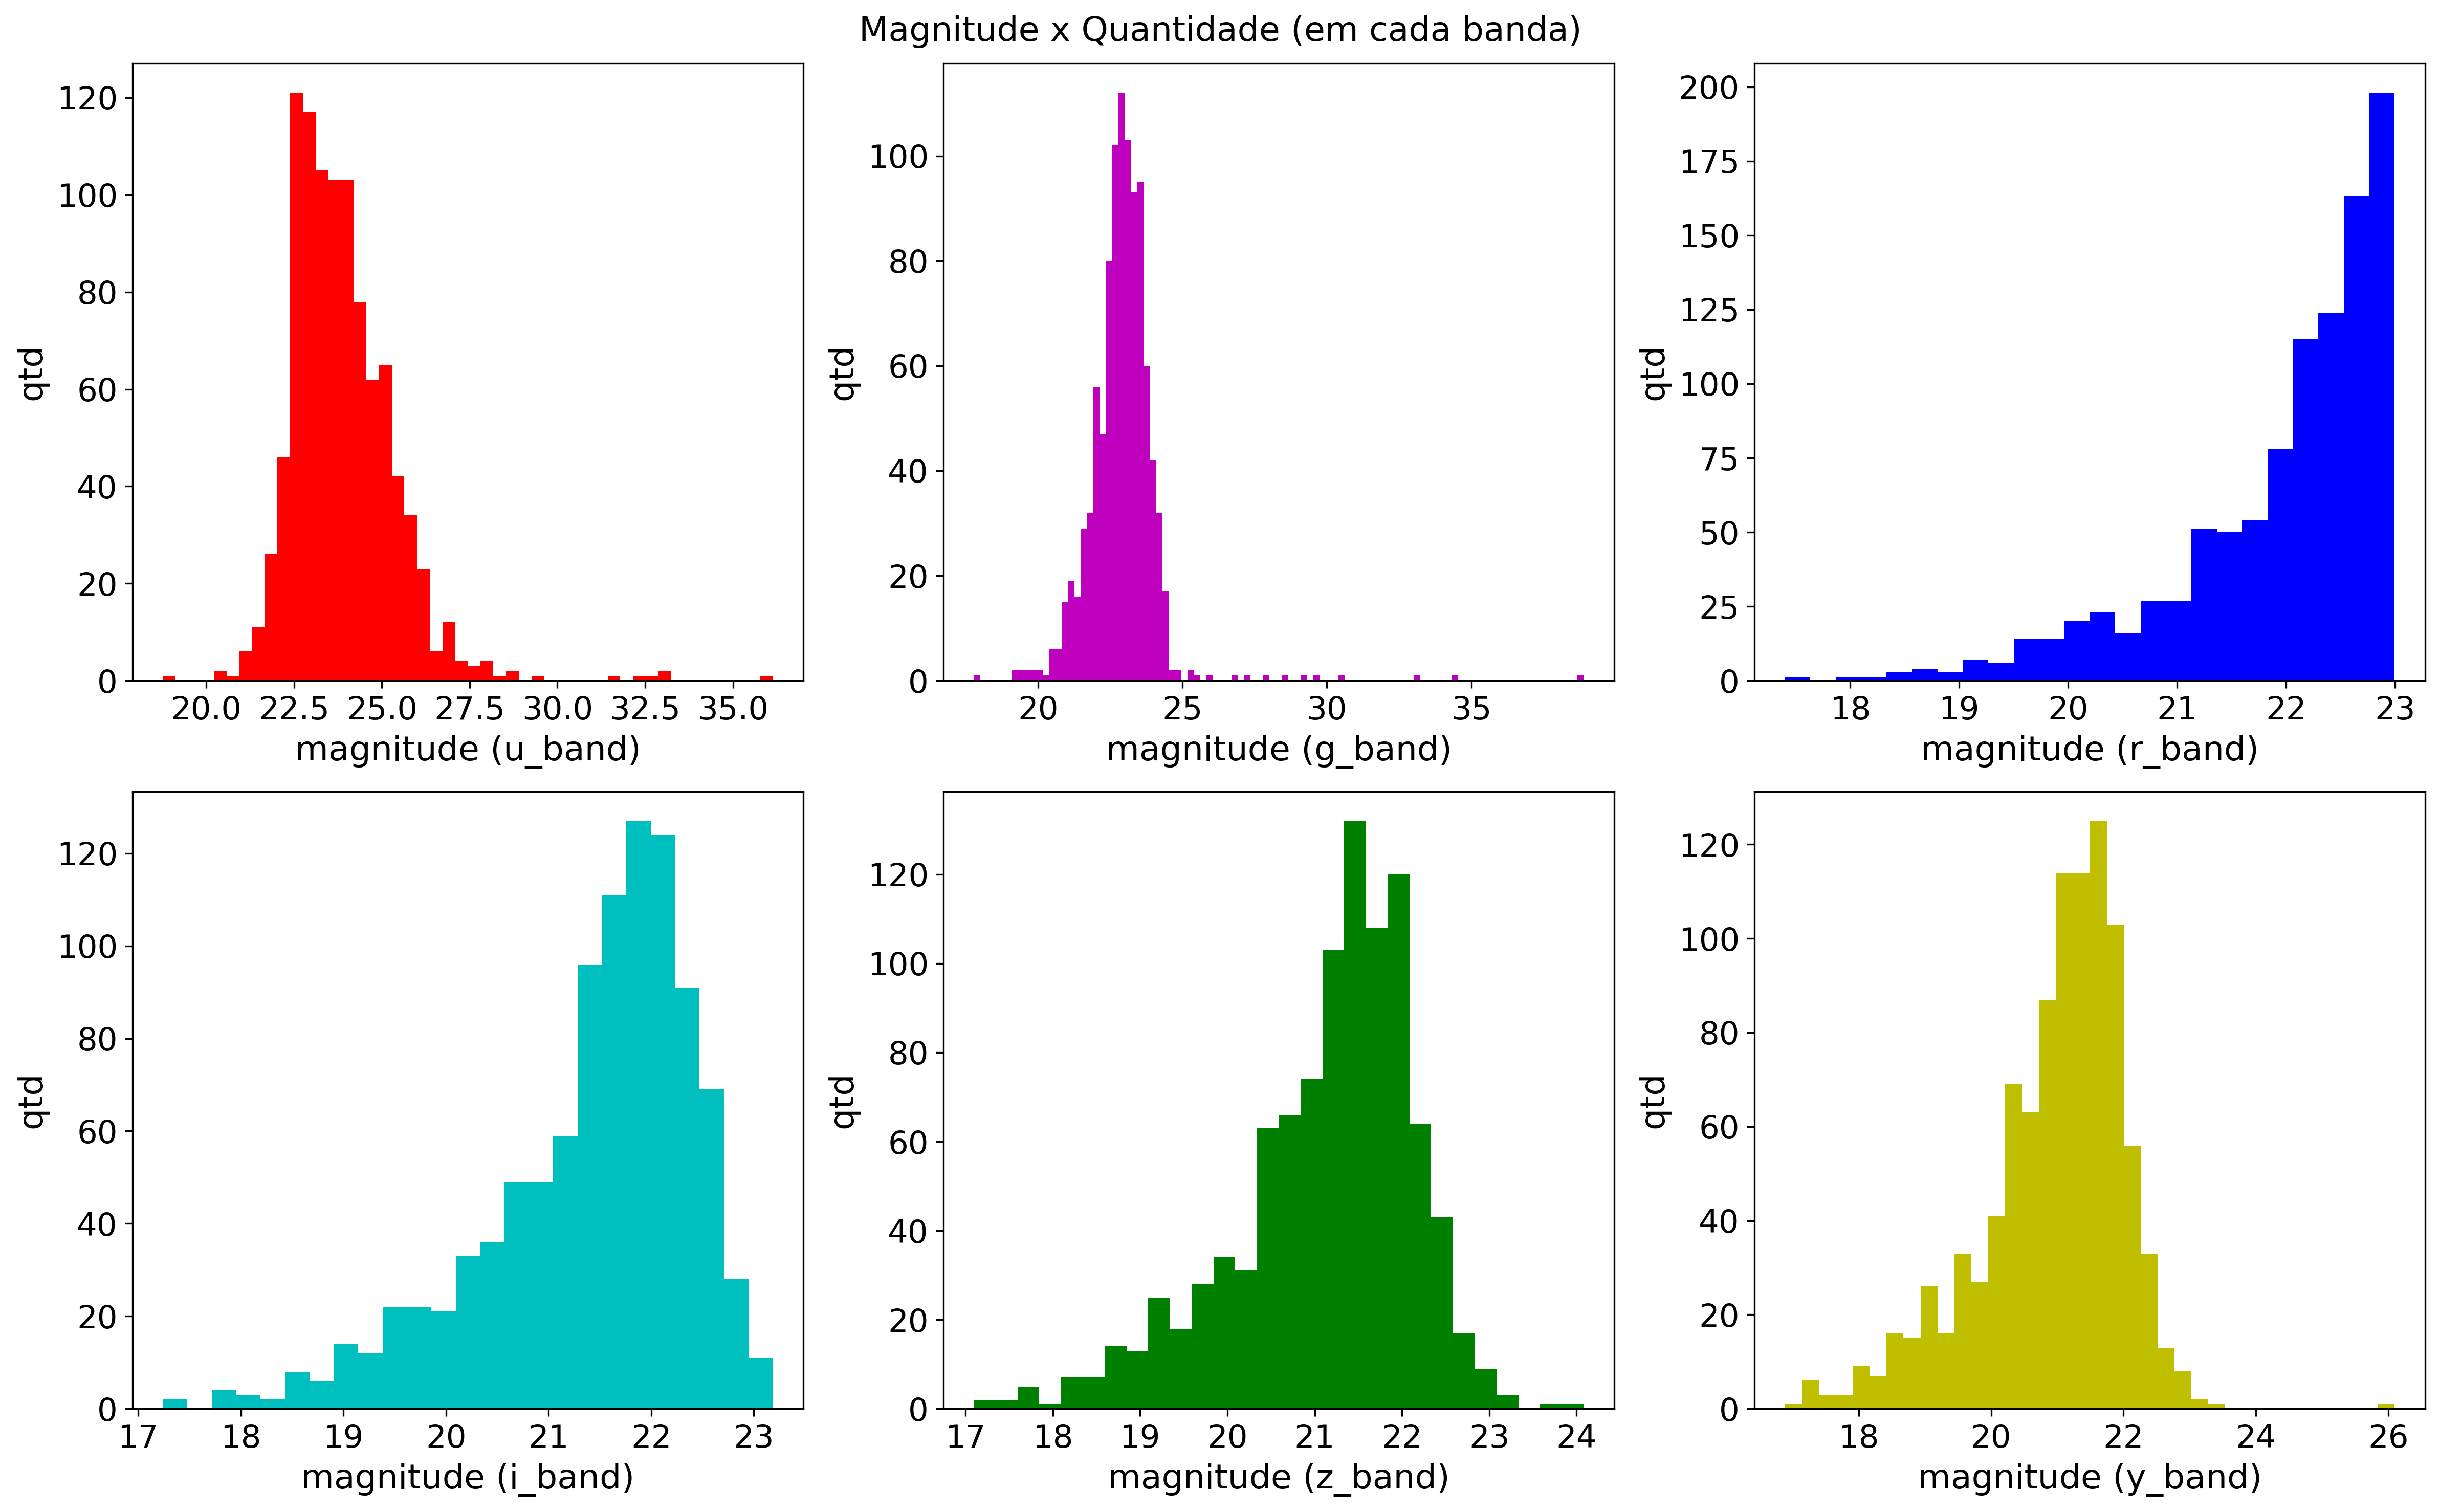

In [65]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Magnitude x Quantidade (em cada banda)", fontsize=16)

pos_grafico = 1

for key, value in banda_cor.items():
    monta_grafico_hist(pos_grafico, key)
    pos_grafico = pos_grafico + 1

## Plot - Magnitude x Erro 

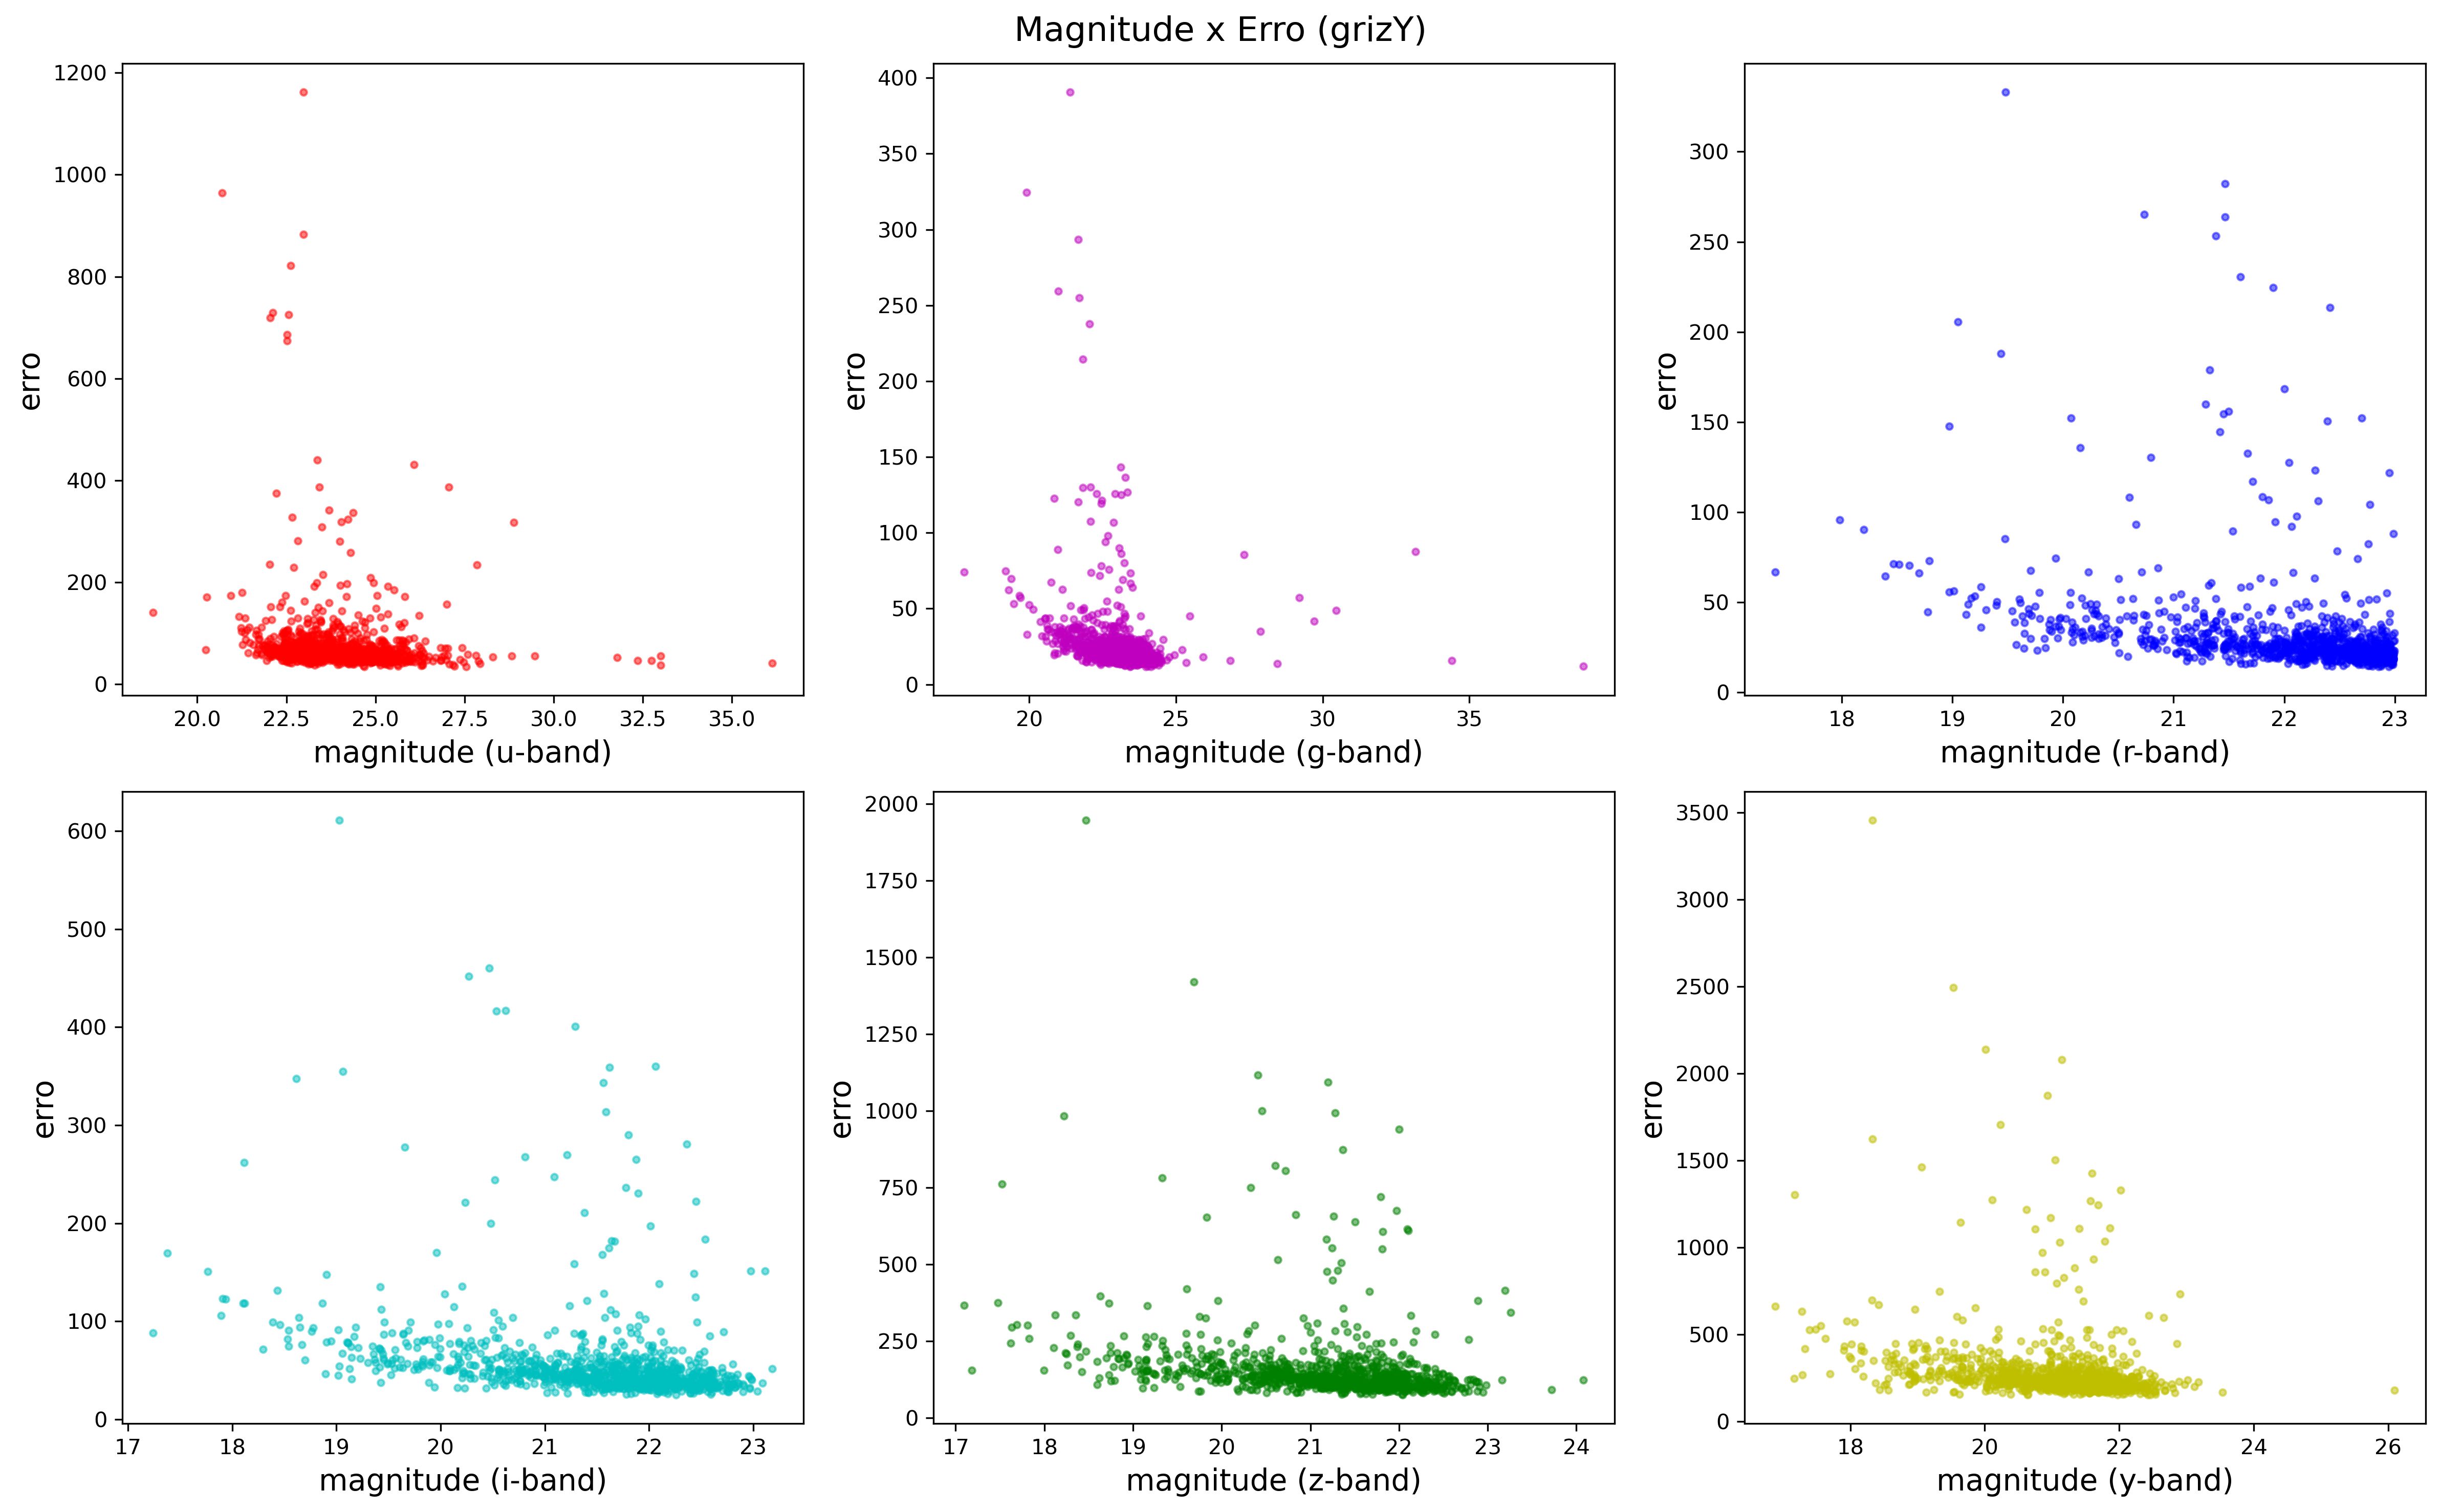

In [74]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Magnitude x Erro (grizY)", fontsize=16)

pos_grafico = 1

for key, value in banda_cor.items():
    plt.subplot(2,3,pos_grafico)
    plt.plot(results_pd[f"mag_{key}_cModel"], results_pd[f"{key}_cModelFluxErr"], f"{value}.", alpha=0.5)
    plt.xlabel(f"magnitude ({key}-band)", fontsize=14)
    plt.ylabel("erro", fontsize=14)
#    plt.xlim(0, 40)
 #   plt.ylim(0, 120)
    plt.tight_layout()

    pos_grafico = pos_grafico + 1

## Plot S/N x magnitude

In [72]:
def mag_sr(pos, key, x_min=15, x_max=30, y_min=0, y_max=60):
    plt.subplot(2,3,pos)
    plt.plot(results_pd[f"mag_{key}_cModel"], 1/results_pd[f"{key}_cModelFluxErr"], f"{banda_cor.get(key)}.", alpha=0.2, label=key)

    plt.xlabel(f"magnitude ({key}_band)", fontsize=16)
    plt.ylabel("S/R", fontsize=16)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    #plt.hlines(10, 0, 50)

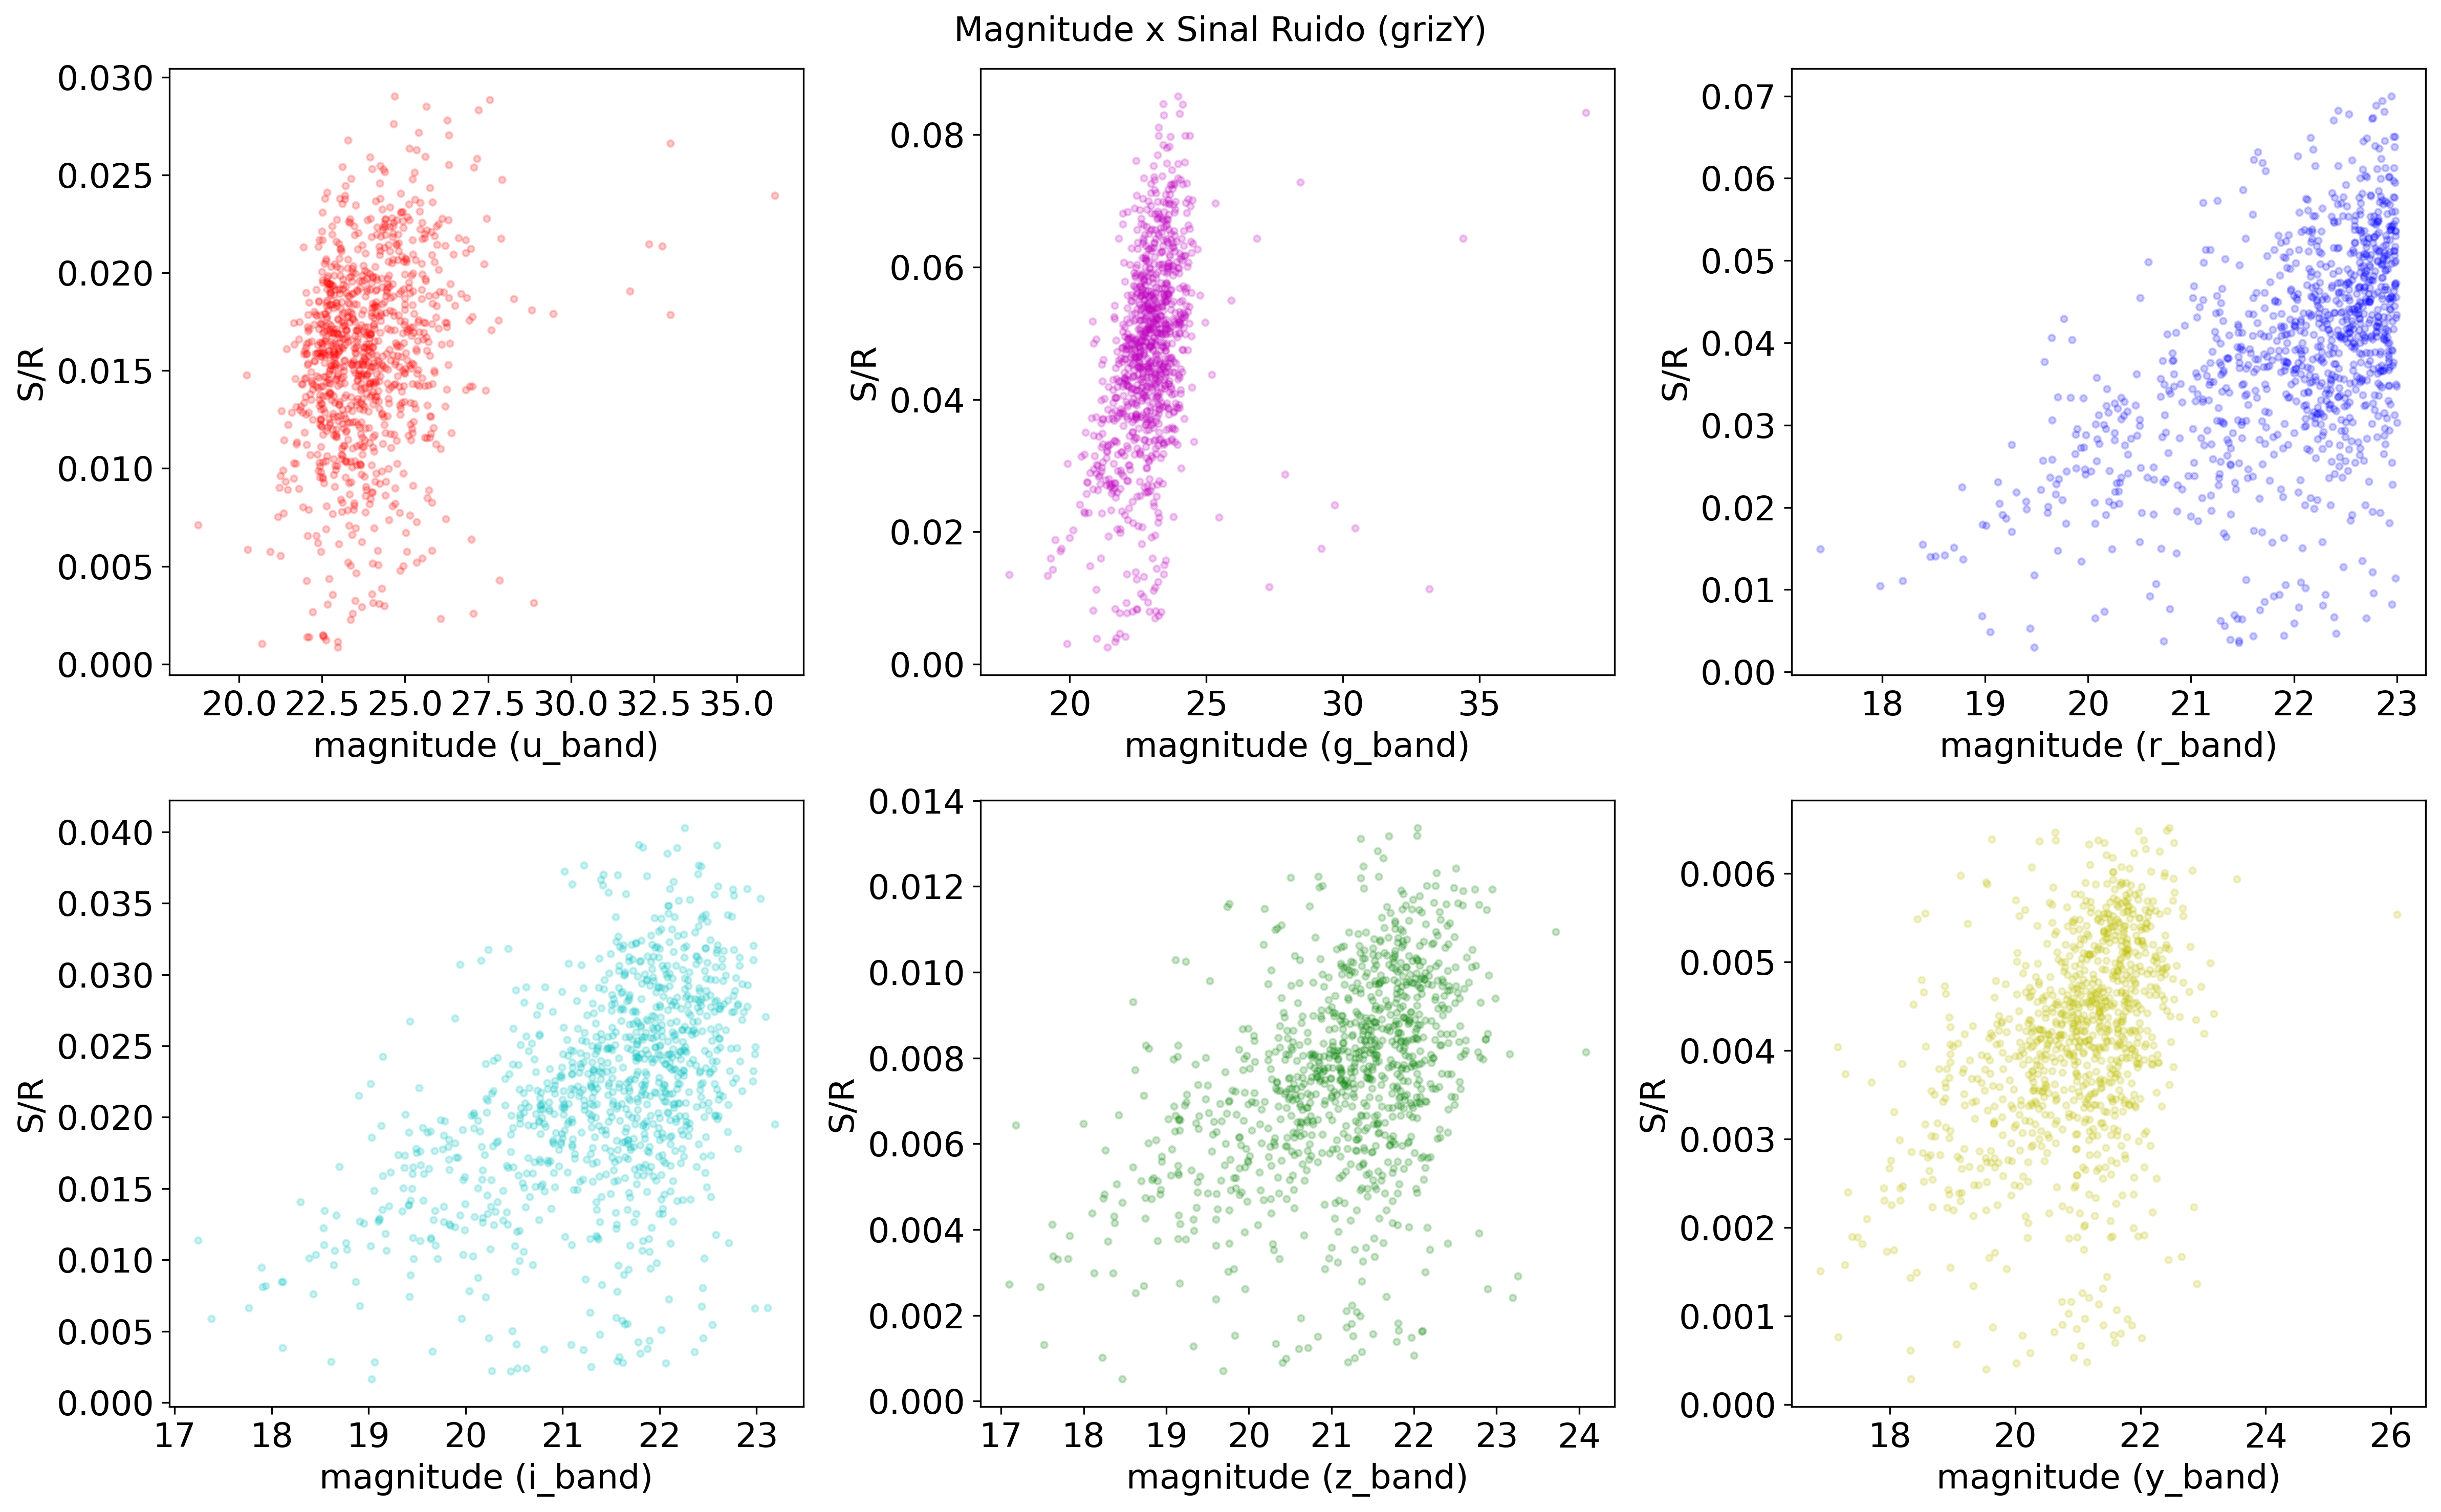

In [ ]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Magnitude x Sinal Ruido (grizY)", fontsize=16)

bandas = list(banda_cor)

mag_sr(1, bandas[0], 20, 28, 0, 15)
mag_sr(2, bandas[1], 21, 27, 0, 30)
mag_sr(3, bandas[2], 21, 26, 0, 30)
mag_sr(4, bandas[3], 21, 26, 0, 30)
mag_sr(5, bandas[4], 20, 26, 0, 30)
mag_sr(6, bandas[5], 19, 26, 0, 20)

plt.tight_layout()

## Hist - distribuição de cor

In [80]:
def qtd_cor(key1, key2):
    plt.hist(results_pd[f"mag_{key1}_cModel"]-results_pd[f"mag_{key2}_cModel"], bins="fd", alpha=0.2, label=f"{key1}-{key2}")

    plt.xlabel(f"color ({key1}-{key2})", fontsize=16)
    plt.ylabel("qtd", fontsize=16)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.vlines(0, 0, 200)

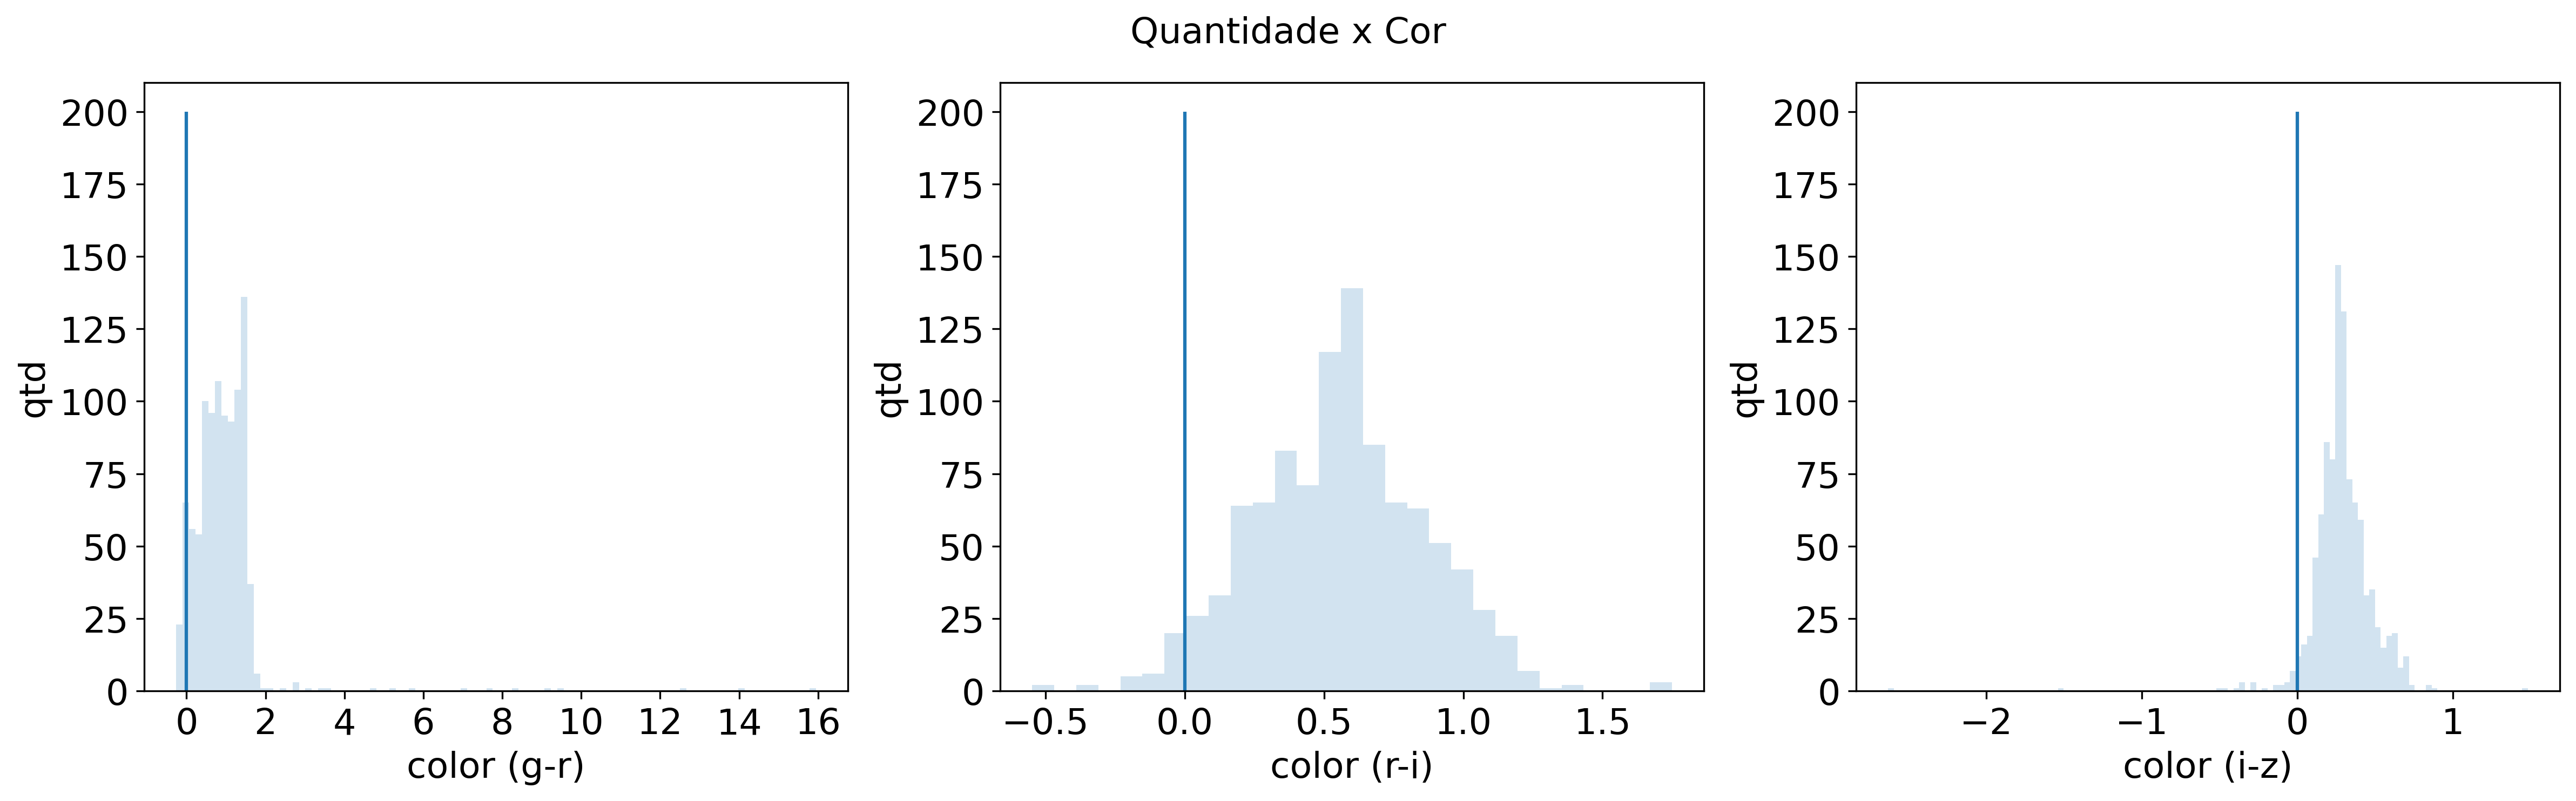

In [81]:
plt.figure(figsize=[16,5], dpi=300)
plt.suptitle("Quantidade x Cor", fontsize=16)

plt.subplot(1,3,1)
qtd_cor("g", "r")

plt.subplot(1,3,2)
qtd_cor("r", "i")

plt.subplot(1,3,3)
qtd_cor("i", "z")

plt.tight_layout()

## Plot - cor cor

In [92]:
def cor_cor(key1, key2, key3, key4):
    plt.plot(results_pd[f"mag_{key1}_cModel"]-results_pd[f"mag_{key2}_cModel"], results_pd[f"mag_{key3}_cModel"]-results_pd[f"mag_{key4}_cModel"], f"{banda_cor.get(key1)}.", alpha=0.2)

    plt.xlabel(f"color ({key1}-{key2})", fontsize=16)
    plt.ylabel(f"color ({key3}-{key4})", fontsize=16)

    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    plt.vlines(0, -0.5, 15)
    plt.hlines(0, -0.5, 2)


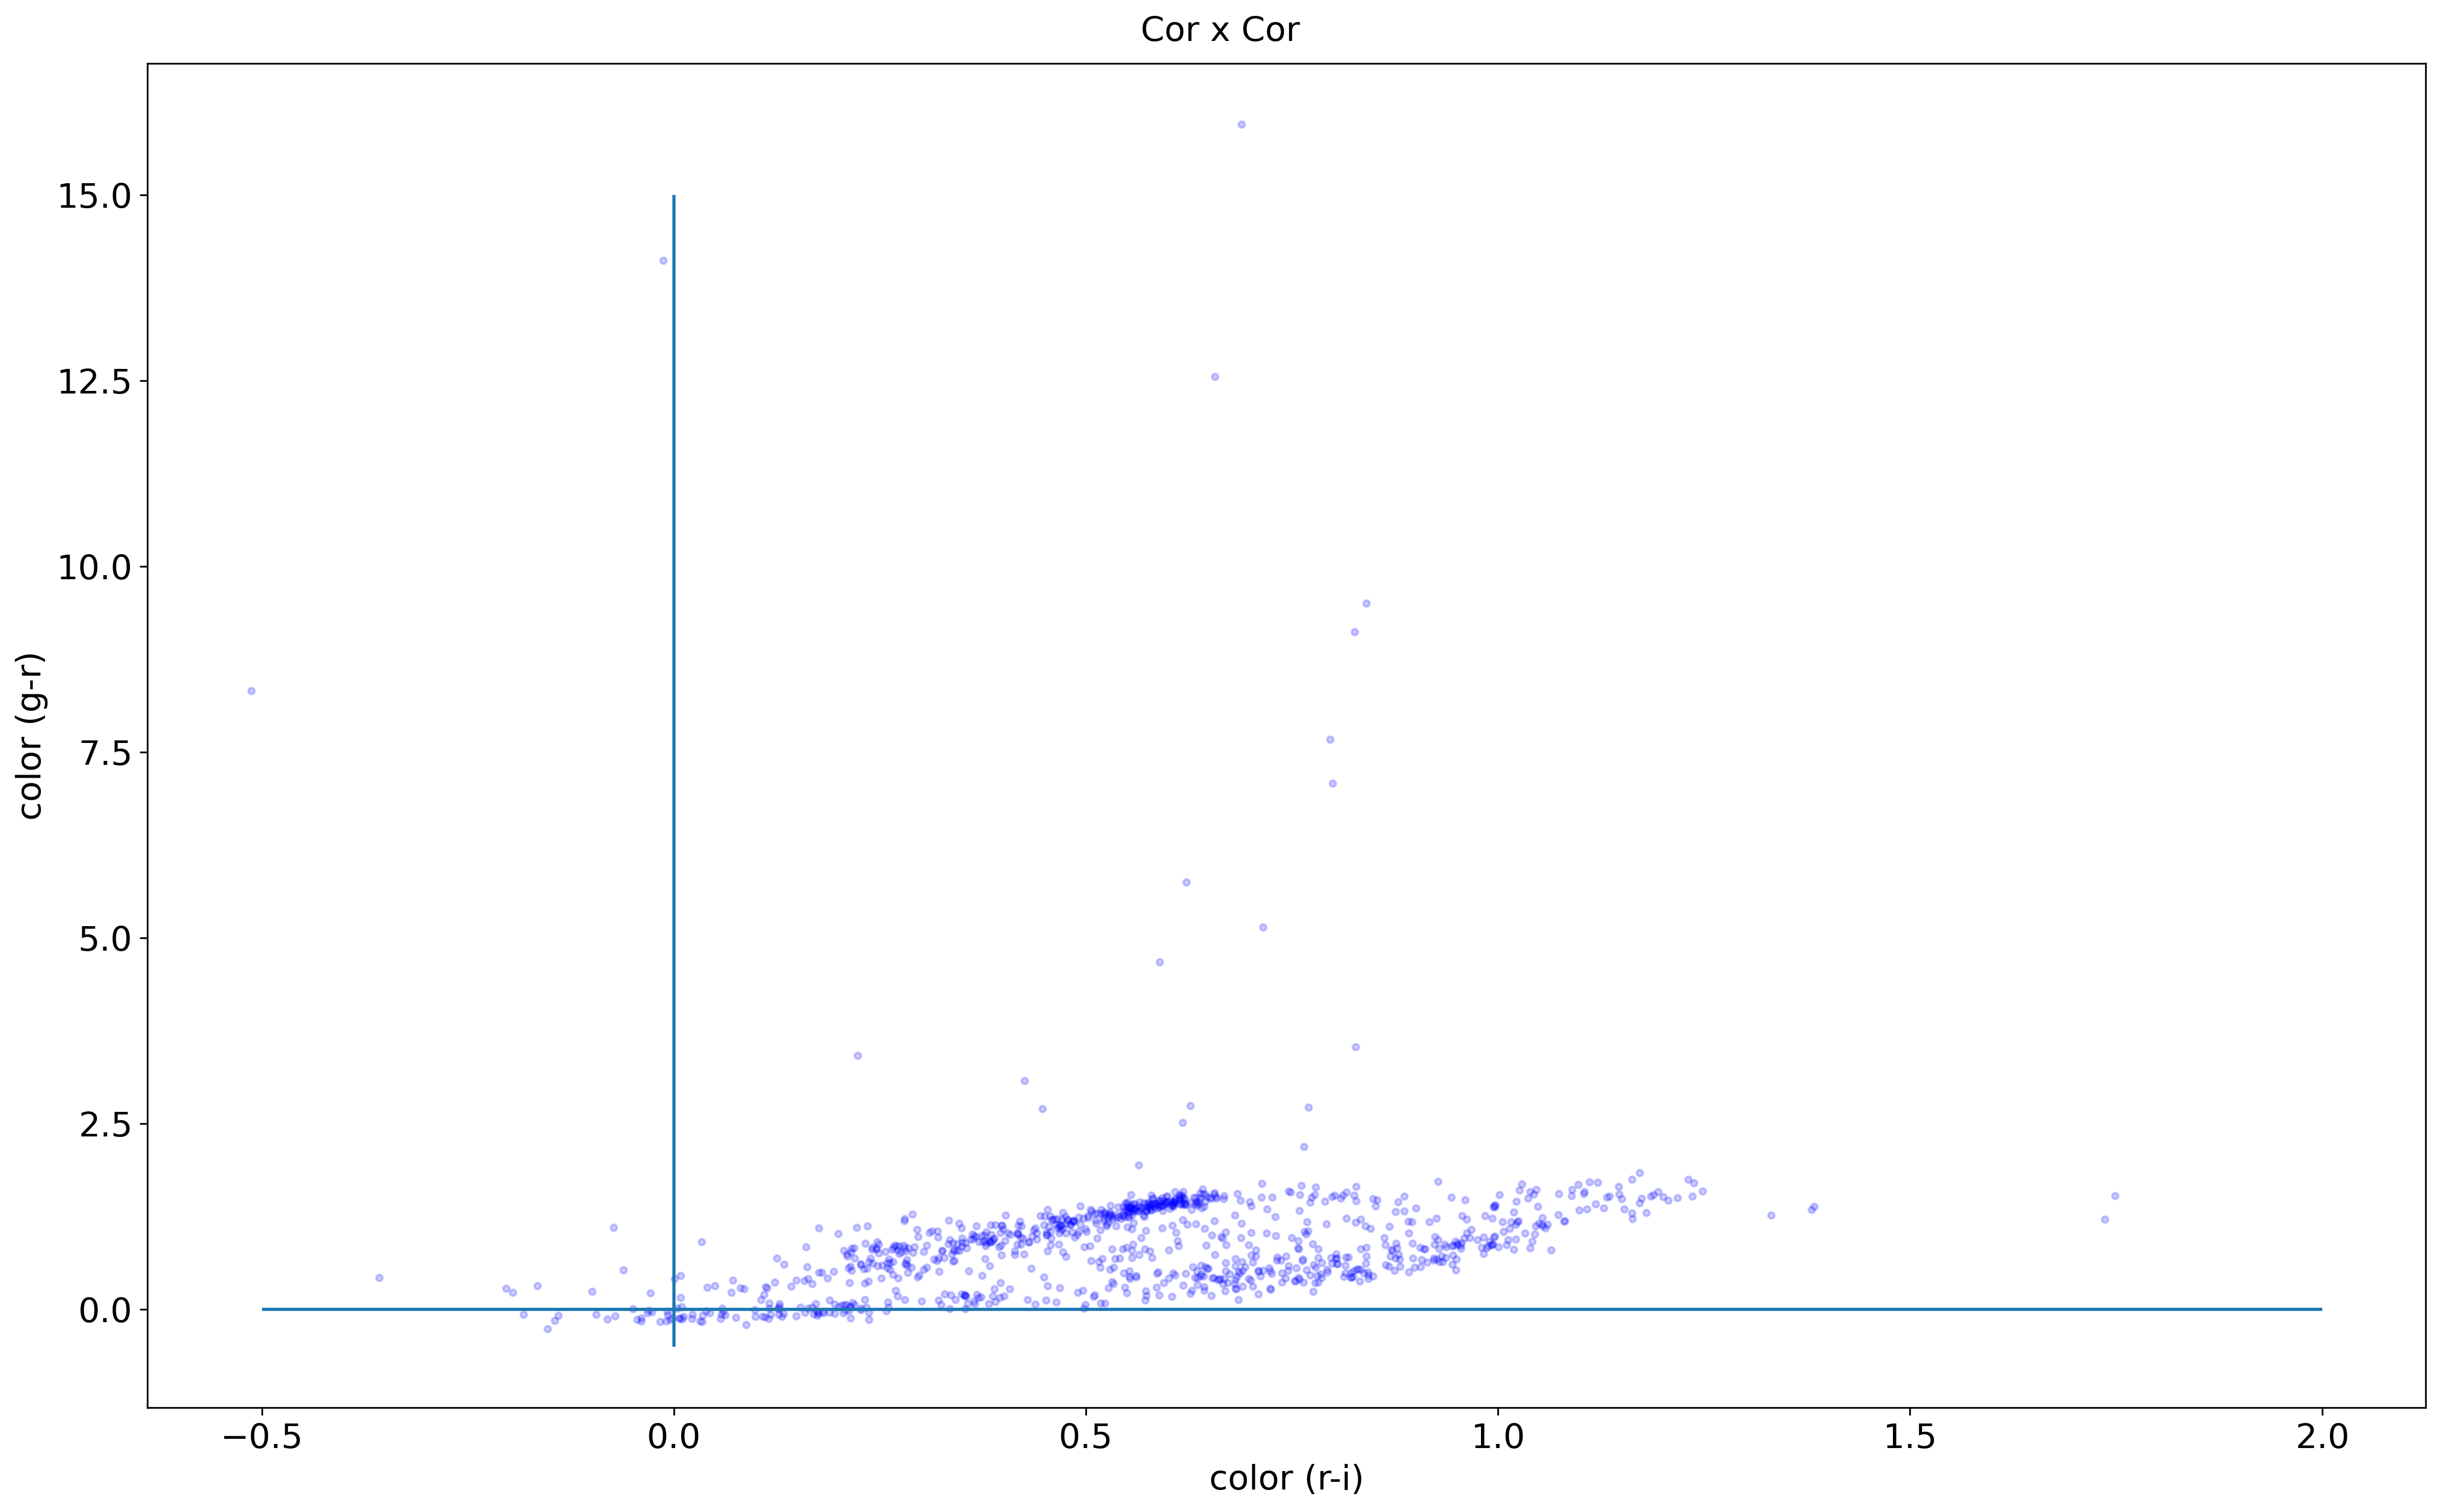

In [93]:
plt.figure(figsize=[16,10], dpi=300)
plt.suptitle("Cor x Cor", fontsize=16)

cor_cor("r", "i", "g", "r")

plt.tight_layout()